# Move & Chill: Sensordaten auf öffentlichen Sitzbänken

Das **Tiefbauamt**, **ewz** und die **ETH Zürich** testen auf dem Münsterhof und dem Vulkanplatz neu entwickelte Sensoren. Die Sensoren sollen Aufschluss darüber geben, wo, **wie häufig und wie lange die Stühle auf den Plätzen genutzt** werden. Falls sich die Sensoren bewähren, könnten sie künftig für die Planung von öffentlichen Räumen wie etwa Plätzen eingesetzt werden. 

Das Tiefbauamt verfügt über zahlreiche Mobilitätsdaten wie etwa Velofrequenzen. Über das Verhalten der Bevölkerung im öffentlichen Raum sind hingegen nur wenig Daten vorhanden. Daher testet das Tiefbauamt zusammen mit ewz und der ETH Zürich auf dem Münsterhof und dem Vulkanplatz bis Ende September 2022 neu entwickelte Sensoren. Der Datenschutz ist gewährleistet und die Privatsphäre der Nutzer*innen wird gewahrt.

## Pro Platz 8 Sensoren
Die Sensoren messen die Belegung und Verweildauer auf den Stühlen. Ebenfalls erhoben werden der Standort der Stühle, die Temperatur, die Luftfeuchtigkeit und der Lärmpegel. Die Sensoren sind an den Stuhlbeinen angebracht. Der Test soll Aufschluss darüber geben, wo und für wie lange die Stühle genutzt werden. Geprüft werden etwa die Zuverlässigkeit der Sensoren sowie die Datenübertragung und -auswertung. 

## OpenData:
Die **Daten und Metadaten** sind unter folgendem Link auf dem OGD-Katalog zu finden: https://data.stadt-zuerich.ch/dataset/geo_move_and_chill

### Beschreibung
[**Move and Chill**](https://www.stadt-zuerich.ch/ted/de/index/taz/erhalten/temporaere_nutzungen/smartsensor.html) ist ein Pilotprojekt zum Testen eines Smart-Sensors, der die Verweildauer auf einem Sitzelement erhebt. Abhängigkeiten wie Temperatur, Luftfeuchtigkeit und Lärmpegel werden miterhoben. Die Sensoren sind an Stühlen auf dem Vulkanplatz und dem Münsterhof angebracht. Die Daten werden alle 30 Minuten erhoben.

Erhoben wird:

- Verweildauer (Attribut `SIT`)
- Lufttemperatur (Attribut `TEMPERATURE`)
- Luftfeuchtigkeit (Attribut `HUMIDITY`)
- Standort (3-4m Genauigkeit) (Attribut `GEOMETRIE`)
- Lärmpegel (Attribut `NOISE`)
#- Umgebungshelligkeit (Attribut `?`)



### Datenbezug

Alle Daten werden als Geodaten zur Verfügung gestellt. Via dem [**GeoJSON-Service**](https://www.stadt-zuerich.ch/geodaten/download/Move_and_Chill?format=geojson_link)  können die Messwerte direkt eingebunden werden. Die übrigen Datenformate wie shp, gpkg, dxf, etc. müssen vor der Verwendung heruntergeladen und entzippt werden.


### API und InfoBoard

Das ETH-Team hat ein Infoboard erstellt (PW geschützt): https://smartcity.pbl.ee.ethz.ch/api/info.php
API: InfoBoard https://smartcity.pbl.ee.ethz.ch/api/

### Test AGOL-Dashboard von mir

Zur einfacheren Datenexploration habe ich ein AGOL-Test-Dashboard gemacht, siehe:
https://www.arcgis.com/apps/dashboards/6fbb7ce2f9d342e29b0d38ec154814a6
<!---  
Dieses Notebook verwendet als Vorlage die Webseite «[Kitas in Berlin - Jupyter Notebook](https://juanitorduz.github.io/kitas_berlin/)» 
---!>

Mit Colab kann **dieses Jupyter-Notebook interaktiv im Browser** gestartet werden:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DonGoginho/myPy_RIS_API/blob/main/RIS_API_AL_Geschaefte.ipynb)


<!--
**Inhaltsverzeichnis:**

1. [Daten importieren](#LiesDatenein)
2. [Daten prüfen](#)
3. [Daten analysieren](#Explorative_Analyse)
-->


## Importiere notwendige Packages:

In [1]:
#pip install geopandas fiona requests folium mplleaflet contextily seaborn datetime

In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import fiona; 
import mplleaflet
import pivottablejs
from pivottablejs import pivot_ui

import altair as alt
import datetime
import folium 
import plotly.express as px

import requests
import io
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

import seaborn as sns

plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100

pd.options.display.float_format = '{:.1f}'.format

In [3]:
SSL_VERIFY = False
# evtl. SSL_VERIFY auf False setzen wenn die Verbindung zu https://www.gemeinderat-zuerich.ch nicht klappt (z.B. wegen Proxy)
# Um die SSL Verifikation auszustellen, bitte die nächste Zeile einkommentieren ("#" entfernen)
# SSL_VERIFY = False

In [4]:
if not SSL_VERIFY:
    import urllib3
    urllib3.disable_warnings()

### Zeitvariabeln
Bestimme den aktuellst geladenen Monat. Hier ist es der Stand vor 2 Monaten. 
Bestimme noch weitere evt. sinnvolle Zeitvariabeln.

Zum Unterschied zwischen import datetime und from datedtime import datetime, siehe https://stackoverflow.com/questions/15707532/import-datetime-v-s-from-datetime-import-datetime

Zuerst die Zeitvariabeln als Strings

In [5]:
#today_date = datetime.date.today()
#date_time = datetime.datetime.strptime(date_time_string, '%Y-%m-%d %H:%M')
now = datetime.date.today()
date_today = now.strftime("%Y-%m-%d")
year_today = now.strftime("%Y")
month_today = now.strftime("%m")
day_today = now.strftime("%d")

hour_now  = now.strftime("%H")
weekdayname_today  = now.strftime("%A")
monthdayname_today  = now.strftime("%B")

print('date_today: '+date_today)
print('month_today: '+month_today)
print('weekdayname_today : '+weekdayname_today )
print('monthdayname_today : '+monthdayname_today )

date_day_a_week_ago = (datetime.datetime.now() - datetime.timedelta(days=7)).date()
day_a_week_ago = date_day_a_week_ago.strftime('%Y-%m-%d')


date_today: 2022-10-07
month_today: 10
weekdayname_today : Friday
monthdayname_today : October


Und hier noch die Zeitvariabeln als Integers:
- `aktuellesJahr`
- `aktuellerMonat`: Der gerade jetzt aktuelle Monat
- `selectedMonat`: Der aktuellste Monat in den Daten. In der Regel zwei Monate her.

In [6]:
#now = datetime.now() 
int_times = now.timetuple()

aktuellesJahr = int_times[0]
aktuellerMonat = int_times[1]
selectedMonat = int_times[1]-2

print(aktuellesJahr, 
      aktuellerMonat,
    'datenstand: ', selectedMonat,
     int_times)


2022 10 datenstand:  8 time.struct_time(tm_year=2022, tm_mon=10, tm_mday=7, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=4, tm_yday=280, tm_isdst=-1)


Berechne die Variable Epoche um später das SAS-Datum in ein Unix-Datum umzuwandeln. Bei SAS beginnt die Epoche am 1.1.1960. Bei Unix am 1.1.1970.
Diese Variable wird beim CSV-Import benötigt.

In [7]:
epoch = datetime.datetime(1960, 1, 1)


Für weitere Infos zu Datetime siehe https://www.programiz.com/python-programming/datetime/strftime

## Lies Daten ein


Das **Move & Chill Daten** werden als OGD angeboten unter: https://data.stadt-zuerich.ch/dataset/geo_move_and_chill. 

Zum Download stehten sie auch auf dem städtischen [Geodatenportal](https://www.stadt-zuerich.ch/geodaten) zur Verfügung: 

- Geodaten: https://www.stadt-zuerich.ch/geodaten/download/Move_and_Chill
- Metadaten: https://www.geocat.ch/geonetwork/srv/ger/md.viewer#/full_view/3398dd59-cfc8-4663-bfe8-a94523f6558f

### Importiere die aktuellen Daten direkt ab dem Geodatenportal mit GeoJson-Service

Das Geoportal bietet zahlreiche Geoformate zum Download (Shapefiles, Geopackages, csv, dxf, etc.) wie auch Webservcies (WFS, WMS, WMTS) an.

Die URL zum GeoJSON-Service des aktuellen Bestand lautet:

https://www.ogd.stadt-zuerich.ch/wfs/geoportal/Move_and_Chill?service=WFS&version=1.1.0&request=GetFeature&outputFormat=GeoJSON&typename=view_moveandchill



In [8]:
geojson_url = "https://www.ogd.stadt-zuerich.ch/wfs/geoportal/Move_and_Chill?service=WFS&version=1.1.0&request=GetFeature&outputFormat=GeoJSON&typename=view_moveandchill"


In [9]:
    r = requests.get(geojson_url, verify=False)  
    r.encoding = 'utf-8'
    
    gdf_data2betested = gpd.read_file(
        io.StringIO(r.text), convert_dates=True, keep_default_dates=True, lines=True
    )

gdf_data2betested.dtypes
#gdf_data2betested.columns
gdf_data2betested.sort_values('zeitpunkt', ascending=False)

,humidity,id,latitude,longitude,noise,objectid,sensor_eui,sit,temperature,zeitpunkt,geometry
4408,88.0,4705,47.4,8.5,45.0,4409.0,0080E115003BDA59,0.0,13.5,2022-10-06T01:36:53,POINT (8.54120 47.37012)
4409,88.0,4706,47.4,8.5,45.0,4410.0,0080E115003BDA59,0.0,13.5,2022-10-06T01:06:53,POINT (8.54120 47.37012)
4410,88.0,4707,47.4,8.5,45.0,4411.0,0080E115003BDA59,0.0,13.5,2022-10-06T00:36:53,POINT (8.54120 47.37012)
4411,88.0,4708,47.4,8.5,45.0,4412.0,0080E115003BDA59,0.0,13.5,2022-10-06T00:06:53,POINT (8.54120 47.37012)
4452,84.2,4385,47.4,8.5,45.0,4453.0,0080E115003BDA59,0.0,14.7,2022-10-05T23:31:52,POINT (8.54105 47.36984)
...,...,...,...,...,...,...,...,...,...,...,...
4981,54.9,5276,47.4,8.5,45.0,4982.0,0080E11500180306,41.0,21.8,2022-08-08T08:55:33,POINT (8.49039 47.39296)
4977,33.0,5272,47.4,8.5,45.0,4978.0,0080E115003BC9A9,36.0,31.9,2022-08-08T08:54:15,POINT (8.49086 47.39225)
4973,49.1,5268,47.4,8.5,45.0,4974.0,0080E115003BCF64,55.0,24.1,2022-08-08T08:53:16,POINT (8.49034 47.39256)
4969,55.5,5264,47.4,8.5,47.0,4970.0,0080E115003BC812,78.0,22.0,2022-08-08T08:50:47,POINT (8.48991 47.39185)


#### Anpassungen an den importiereten Daten

Bei Bedarf Anpassungen an den Attributen, wie z.B. Namensänderungen, weglassen von Attributen oder Anpassungen des Datentyps. Hier ein neues Feld im Datetime-Format namens timestamp.

In [10]:
# Rename columns bei Bedarf. Hier nur zur Illustration
rename_cols = {
    'id': 'id'
    , 'latitude': 'latitude'
    , 'longitude': 'longitude'
    , 'noise': 'noise'
    , 'objectid': 'objectid'
    , 'sensor_eui': 'sensor_eui'
    , 'sit': 'sit'
    , 'temperature': 'temperature'
    , 'humidity': 'humidity'
    , 'zeitpunkt': 'zeitpunkt'
    , 'geometry': 'geometry'
}

#columns_to_drop = ['objectid']
# Format data: remove redundant columns, rename columns and add new features.

gdf_data2betested=gdf_data2betested \
    .copy() \
    .rename(columns=rename_cols) \
    .assign(
        timestamp = lambda x: pd.to_datetime(gdf_data2betested['zeitpunkt'])
        , year = lambda x: x.timestamp.dt.year
        , month = lambda x: x.timestamp.dt.month
        , month_name = lambda x: x.timestamp.dt.month_name() 
        , weekday = lambda x: x.timestamp.dt.dayofweek
        , weekday_name = lambda x: x.timestamp.dt.day_name()
        , full_hour= lambda x: x.timestamp.dt.hour,   

    )
    #.drop(columns_to_drop, axis=1) \    
        
      
gdf_data2betested.sort_values('id', ascending="zeitpunkt").head(5)




,humidity,id,latitude,longitude,noise,objectid,sensor_eui,sit,temperature,zeitpunkt,geometry,timestamp,year,month,month_name,weekday,weekday_name,full_hour
292,85.7,1,47.4,8.5,45.0,293.0,0080E115003BCF64,0.0,16.6,2022-09-01T00:06:49,POINT (8.49015 47.39268),2022-09-01 00:06:49,2022,9,September,3,Thursday,0
293,85.7,2,47.4,8.5,45.0,294.0,0080E115003BCF64,0.0,16.6,2022-08-31T23:36:49,POINT (8.49015 47.39268),2022-08-31 23:36:49,2022,8,August,2,Wednesday,23
294,85.7,3,47.4,8.5,45.0,295.0,0080E115003BCF64,0.0,16.6,2022-08-31T23:06:49,POINT (8.49015 47.39268),2022-08-31 23:06:49,2022,8,August,2,Wednesday,23
295,85.7,4,47.4,8.5,45.0,296.0,0080E115003BCF64,0.0,16.6,2022-08-31T22:36:49,POINT (8.49015 47.39268),2022-08-31 22:36:49,2022,8,August,2,Wednesday,22
296,85.1,5,47.4,8.5,45.0,297.0,0080E115003BC2AD,44.0,16.8,2022-09-01T00:14:10,POINT (8.49004 47.39229),2022-09-01 00:14:10,2022,9,September,3,Thursday,0


In [11]:
hour_now  = now.strftime("%H")
weekdayname_today  = now.strftime("%A")
monthdayname_today  = now.strftime("%B")

#### Daten lokal abspeichern
1) Speichere den direkten GeoJSON-Import via WFS-GeoJSON-Service als Geopackage zur Ablage lokal ab.
2) Speichere ein GeoJSON-File lokal ab um es für AGOL verwenden zu können.


In [12]:
#Import mit Geopandas, Webseite: https://geopandas.org/docs/user_guide/io.html oder  import fiona; help(fiona.open)

#gdf_data2betested.to_file("//szh.loc/ssz/applikationen/OGD/Daten/Quelldaten/TED/TAZ/move_and_chill/data_exports/mc"+date_today+".gpkg", layer='view_moveandchill', driver="GPKG")
#print("//szh.loc/ssz/applikationen/OGD/Daten/Quelldaten/TED/TAZ/move_and_chill/data_exports/mc"+date_today+".gpkg")

gdf_data2betested.to_file("//szh.loc/ssz/data/GIS/Sandbox/2022/move_and_chill/geo data/moveandchill_exp_jupyterlab.gpkg", layer='view_moveandchill', driver="GPKG")
gdf_data2betested.to_file("//szh.loc/ssz/data/GIS/Sandbox/2022/move_and_chill/geo data/moveandchill_exp_jupyterlab.json", driver="GeoJSON")

In [13]:
gdf_data2betested.columns
gdf_data2betested

,humidity,id,latitude,longitude,noise,objectid,sensor_eui,sit,temperature,zeitpunkt,geometry,timestamp,year,month,month_name,weekday,weekday_name,full_hour
0,83.7,75,47.4,8.5,45.0,1.0,0080E115003BDA59,0.0,16.4,2022-09-01T02:00:33,POINT (8.54107 47.37040),2022-09-01 02:00:33,2022,9,September,3,Thursday,2
1,83.7,76,47.4,8.5,45.0,2.0,0080E115003BDA59,0.0,16.4,2022-09-01T01:30:33,POINT (8.54107 47.37040),2022-09-01 01:30:33,2022,9,September,3,Thursday,1
2,84.6,77,47.4,8.5,45.0,3.0,0080E115003BC812,0.0,15.6,2022-09-01T03:03:43,POINT (8.48997 47.39216),2022-09-01 03:03:43,2022,9,September,3,Thursday,3
3,84.6,78,47.4,8.5,45.0,4.0,0080E115003BC812,0.0,15.6,2022-09-01T02:33:43,POINT (8.48997 47.39216),2022-09-01 02:33:43,2022,9,September,3,Thursday,2
4,84.6,79,47.4,8.5,45.0,5.0,0080E115003BC812,0.0,15.6,2022-09-01T02:03:43,POINT (8.48997 47.39216),2022-09-01 02:03:43,2022,9,September,3,Thursday,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29807,87.3,29492,47.4,8.5,45.0,29808.0,0080E115003BC812,0.0,17.0,2022-08-31T06:45:18,POINT (8.49014 47.39217),2022-08-31 06:45:18,2022,8,August,2,Wednesday,6
29808,89.2,29493,47.4,8.5,45.0,29809.0,0080E115003BC1DF,0.0,17.2,2022-08-31T08:23:59,POINT (8.49036 47.39236),2022-08-31 08:23:59,2022,8,August,2,Wednesday,8
29809,89.2,29494,47.4,8.5,45.0,29810.0,0080E115003BC1DF,0.0,17.2,2022-08-31T07:53:59,POINT (8.49036 47.39236),2022-08-31 07:53:59,2022,8,August,2,Wednesday,7
29810,89.2,29495,47.4,8.5,45.0,29811.0,0080E115003BC1DF,0.0,17.2,2022-08-31T07:23:59,POINT (8.49036 47.39236),2022-08-31 07:23:59,2022,8,August,2,Wednesday,7


#### Einen Dataframe erstellen
Wandle den Geodataframe in einen normalen Dataframe um

In [14]:
df_data2betested = pd.DataFrame(gdf_data2betested)
df_data2betested.dtypes

humidity               float64
id                       int64
latitude               float64
longitude              float64
noise                  float64
objectid               float64
sensor_eui              object
sit                    float64
temperature            float64
zeitpunkt               object
geometry              geometry
timestamp       datetime64[ns]
year                     int64
month                    int64
month_name              object
weekday                  int64
weekday_name            object
full_hour                int64
dtype: object

In [15]:
#df_data2betested.plot.scatter(x="timestamp", y="sit")

#### Sensorstandorte über die Zeit

In [16]:
#gdf_data2betested['sensor_eui'].unique()

In [17]:
# Basiskarte mit GeoJSON layer

#timestamp bringt Fehlermeldung, darum droppe ich ihn hier
gdf = gdf_data2betested.drop('timestamp', axis=1)

#Zeichne die Standorte auf eine Karte
m = folium.Map(location=[47.38, 8.53], zoom_start=13, tiles='OpenStreetMap')
folium.features.GeoJson(gdf).add_to(m)
folium.LayerControl().add_to(m)
#m


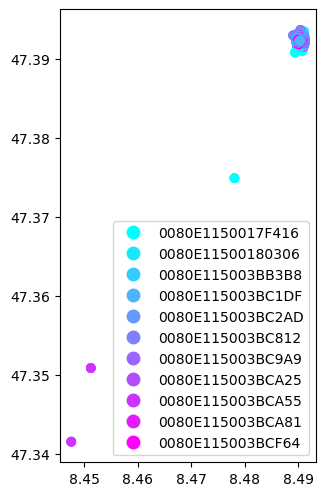

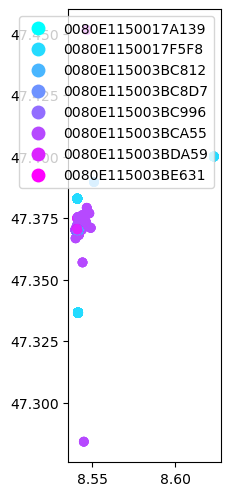

In [18]:
basic_vulkanstrasse = gdf_data2betested.query('longitude < 8.4912').plot(column='sensor_eui', cmap='cool',  legend=True)
basic_münsterhof = gdf_data2betested.query('longitude > 8.54').plot(column='sensor_eui', cmap='cool',  legend=True )

## Explorative_Analyse
To begin, let us get the number of unique values per feature.


In [19]:
gdf_data2betested.apply(lambda x: x.unique().size, axis=0)

humidity         4591
id              29812
latitude         5738
longitude        6215
noise              26
objectid        29812
sensor_eui         17
sit               101
temperature      2216
zeitpunkt       29745
geometry         7255
timestamp       29745
year                1
month               3
month_name          3
weekday             7
weekday_name        7
full_hour          24
dtype: int64

In [20]:
#Ein einzelner Sensor betrachten
df_data2betested.query('sensor_eui == "0080E11500180306"').sort_values('timestamp', ascending=False)

,humidity,id,latitude,longitude,noise,objectid,sensor_eui,sit,temperature,zeitpunkt,geometry,timestamp,year,month,month_name,weekday,weekday_name,full_hour
9144,94.4,13717,47.4,8.5,45.0,9145.0,0080E11500180306,0.0,17.0,2022-09-15T19:33:03,POINT (8.49018 47.39211),2022-09-15 19:33:03,2022,9,September,3,Thursday,19
9145,94.4,13718,47.4,8.5,45.0,9146.0,0080E11500180306,0.0,17.0,2022-09-15T19:03:03,POINT (8.49018 47.39211),2022-09-15 19:03:03,2022,9,September,3,Thursday,19
9146,94.4,13719,47.4,8.5,45.0,9147.0,0080E11500180306,0.0,17.0,2022-09-15T18:33:03,POINT (8.49018 47.39211),2022-09-15 18:33:03,2022,9,September,3,Thursday,18
9147,94.4,13720,47.4,8.5,45.0,9148.0,0080E11500180306,0.0,17.0,2022-09-15T18:03:03,POINT (8.49018 47.39211),2022-09-15 18:03:03,2022,9,September,3,Thursday,18
9096,83.1,13669,47.4,8.5,45.0,9097.0,0080E11500180306,0.0,18.9,2022-09-15T17:27:31,POINT (8.49023 47.39199),2022-09-15 17:27:31,2022,9,September,3,Thursday,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5009,38.2,5304,47.4,8.5,46.0,5010.0,0080E11500180306,51.0,26.2,2022-08-08T11:01:03,POINT (8.49059 47.39233),2022-08-08 11:01:03,2022,8,August,0,Monday,11
4978,54.9,5273,47.4,8.5,57.0,4979.0,0080E11500180306,45.0,21.8,2022-08-08T10:25:33,POINT (8.49039 47.39296),2022-08-08 10:25:33,2022,8,August,0,Monday,10
4979,54.9,5274,47.4,8.5,46.0,4980.0,0080E11500180306,49.0,21.8,2022-08-08T09:55:33,POINT (8.49039 47.39296),2022-08-08 09:55:33,2022,8,August,0,Monday,9
4980,54.9,5275,47.4,8.5,45.0,4981.0,0080E11500180306,29.0,21.8,2022-08-08T09:25:33,POINT (8.49039 47.39296),2022-08-08 09:25:33,2022,8,August,0,Monday,9


Ein kleiner Groupby-Test

In [21]:
 #   .query('kategorie == "Parkbaum"') \
#    .agg(anz_baeume=('objid', 'count'), anz_kinder_va_sk=('objid', 'sum')) \
gdf_data2betested \
    .groupby(['sensor_eui']) \
    .agg(anz_sit=('sit', 'sum'), max_noise=('noise', 'max'), avg_noise=('noise', 'mean'), max_temp=('temperature', 'max'), avg_temp=('temperature', 'mean'), max_hum=('humidity', 'max'), avg_hum=('humidity', 'mean')) \
    .sort_values('anz_sit', ascending=False) \
    .head(2)

,anz_sit,max_noise,avg_noise,max_temp,avg_temp,max_hum,avg_hum
sensor_eui,,,,,,,
0080E115003BC8D7,29719.0,68.0,45.2,37.5,18.6,103.1,69.9
0080E115003BC1DF,27918.0,62.0,45.1,33.4,18.1,103.2,71.0


-----------------------------------------------

Interaktives durchscrollen mit PivottableJS

In [22]:
from pivottablejs import pivot_ui

#pivot_ui(df_data2betested)
pivot_ui(df_data2betested)

### Verwende das Datum als Index

While we did already parse the `datetime` column into the respective datetime type, it currently is just a regular column. 
**To enable quick and convenient queries and aggregations, we need to turn it into the index of the DataFrame**

In [23]:
gdf_data2betested = gdf_data2betested.set_index("timestamp")
df_data2betested = df_data2betested.set_index("timestamp")

In [24]:
gdf_data2betested.loc[date_today].head(2)
df_data2betested.loc[date_today].head(2)
#data2betested.loc["2021-10-31":"2021-11-30"].head(2)

,humidity,id,latitude,longitude,noise,objectid,sensor_eui,sit,temperature,zeitpunkt,geometry,year,month,month_name,weekday,weekday_name,full_hour
timestamp,,,,,,,,,,,,,,,,,


### Visualisierungen nach Zeitausschnitten

In [25]:
df_data2betested.columns
#df_data2betested.dtypes

Index(['humidity', 'id', 'latitude', 'longitude', 'noise', 'objectid',
       'sensor_eui', 'sit', 'temperature', 'zeitpunkt', 'geometry', 'year',
       'month', 'month_name', 'weekday', 'weekday_name', 'full_hour'],
      dtype='object')

#### Entwicklung der Sitzbelegungen

Wöchentliche, tägliche und stündliche Summierungen der Messdaten

In [26]:
weekly_means = df_data2betested[['humidity', 'noise', 'sit', 'temperature']].resample("W").mean()
weekly_medians = df_data2betested[['humidity', 'noise', 'sit', 'temperature']].resample("W").median()
daily_means = df_data2betested[['humidity', 'noise', 'sit', 'temperature']].resample("D").mean()
daily_medians = df_data2betested[['humidity', 'noise', 'sit', 'temperature']].resample("D").median()
hourly_means = df_data2betested[['humidity', 'noise', 'sit', 'temperature']].resample("H").mean()
hourly_medians = df_data2betested[['humidity', 'noise', 'sit', 'temperature']].resample("H").median()

#weekly_means.sort_values('sit', ascending=False)
daily_means.sort_values('timestamp', ascending=False).head(2)
#daily_medians.sort_values('timestamp', ascending=False)
#hourly_means.sort_values('timestamp', ascending=False)
#hourly_medians.sort_values('timestamp', ascending=False)

,humidity,noise,sit,temperature
timestamp,,,,
2022-10-06,88.0,45.0,0.0,13.5
2022-10-05,76.6,45.0,0.0,15.3


In [27]:
df_data2betested.columns

Index(['humidity', 'id', 'latitude', 'longitude', 'noise', 'objectid',
       'sensor_eui', 'sit', 'temperature', 'zeitpunkt', 'geometry', 'year',
       'month', 'month_name', 'weekday', 'weekday_name', 'full_hour'],
      dtype='object')

In [28]:
#myAgg = data2betested.loc["2008-11-30":"2021-10-31"]
myAgg = df_data2betested.loc["2022-08-09":date_today]\
    .groupby(['full_hour', 'weekday','weekday_name','sensor_eui']) \
    .agg(sit_hourly_means=('sit', 'mean')
         , noise_hourly_means=('noise', 'mean')
         , temp_hourly_means=('temperature', 'mean')
        , humidity_hourly_means=('humidity', 'mean')
        )\
    .sort_values('weekday', ascending=False) 

myAgg.reset_index().head(6)



C:\ProgramData\Anaconda3\envs\gogo_gis\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  


,full_hour,weekday,weekday_name,sensor_eui,sit_hourly_means,noise_hourly_means,temp_hourly_means,humidity_hourly_means
0,23,6,Sunday,0080E115003BE631,1.9,45.0,17.4,76.5
1,17,6,Sunday,0080E1150017A139,7.4,45.0,23.8,52.2
2,2,6,Sunday,0080E115003BC996,0.0,45.0,15.3,82.4
3,2,6,Sunday,0080E115003BC8D7,6.2,45.0,15.3,83.4
4,2,6,Sunday,0080E115003BC812,0.0,45.0,15.1,86.4
5,2,6,Sunday,0080E115003BC2AD,0.0,45.0,14.2,95.3


#### Stundenmittelwerte

In [29]:
df_data2betested.columns
weekly_means.columns

Index(['humidity', 'noise', 'sit', 'temperature'], dtype='object')

In [30]:
#hourly_means[['sit','noise','temperature', 'humidity']].loc["2022-08-09":date_today].reset_index().melt("timestamp")

In [31]:
myTitle = "Stundenmittelwerte"
alt.Chart(hourly_means[['sit','noise','temperature', 'humidity']].loc["2022-08-09":date_today].reset_index().melt("timestamp"), title=myTitle).mark_line(strokeWidth=1).encode(
    x=alt.X('timestamp', axis=alt.Axis(format='', title='Datum'))
    , y=alt.X('value', axis=alt.Axis(title='Mittelwerte'))
    , color=alt.Color('variable', legend=alt.Legend(title="Messwerte", orient="right"))    
    , tooltip=['variable','value']       
).properties(width=900, height=400).interactive()



MaxRowsError: The number of rows in your dataset is greater than the maximum allowed (5000). For information on how to plot larger datasets in Altair, see the documentation

alt.Chart(...)

In [32]:
#hourly_means[['sit','noise','temperature', 'humidity']].loc["2022-08-09":date_today].reset_index().melt("timestamp")

#### Tagesmittelwerte

In [33]:
myTitle="Tagesmittelwerte"

alt.Chart(daily_means[['sit','noise','temperature', 'humidity']].loc["2022-08-09":date_today].reset_index().melt("timestamp"), title=myTitle).mark_line(strokeWidth=1).encode(
    x=alt.X('timestamp', axis=alt.Axis(format='', title='Datum'))
    , y=alt.X('value', axis=alt.Axis(title='Mittelwerte'))
    , color=alt.Color('variable', legend=alt.Legend(title="Messwerte", orient="right"))    
    , tooltip=['variable','value']       
).properties(width=900, height=400).interactive()

alt.Chart(...)

In [34]:
df_data2betested.columns

Index(['humidity', 'id', 'latitude', 'longitude', 'noise', 'objectid',
       'sensor_eui', 'sit', 'temperature', 'zeitpunkt', 'geometry', 'year',
       'month', 'month_name', 'weekday', 'weekday_name', 'full_hour'],
      dtype='object')

#### Sitzbelegungswerte von letzter Woche

In [35]:
myTitle="Last week"

alt.Chart(df_data2betested[['sensor_eui','sit']].loc[day_a_week_ago:date_today].reset_index(), title=myTitle).mark_line(strokeWidth=1).encode(
    x=alt.X('timestamp:T', axis=alt.Axis(format= '', title='Datum'))
    , y=alt.X('sit', axis=alt.Axis(title='Mittelwerte'))
    , color=alt.Color('sensor_eui', legend=alt.Legend(title="Messwerte", orient="right"))    
    , tooltip=['sensor_eui','sit']       
).properties(width=900, height=400).interactive()

C:\ProgramData\Anaconda3\envs\gogo_gis\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  This is separate from the ipykernel package so we can avoid doing imports until


alt.Chart(...)

#### Zeitverläufe zur Sitzbelegung der einzelnen Sensoren

C:\ProgramData\Anaconda3\envs\gogo_gis\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  """Entry point for launching an IPython kernel.


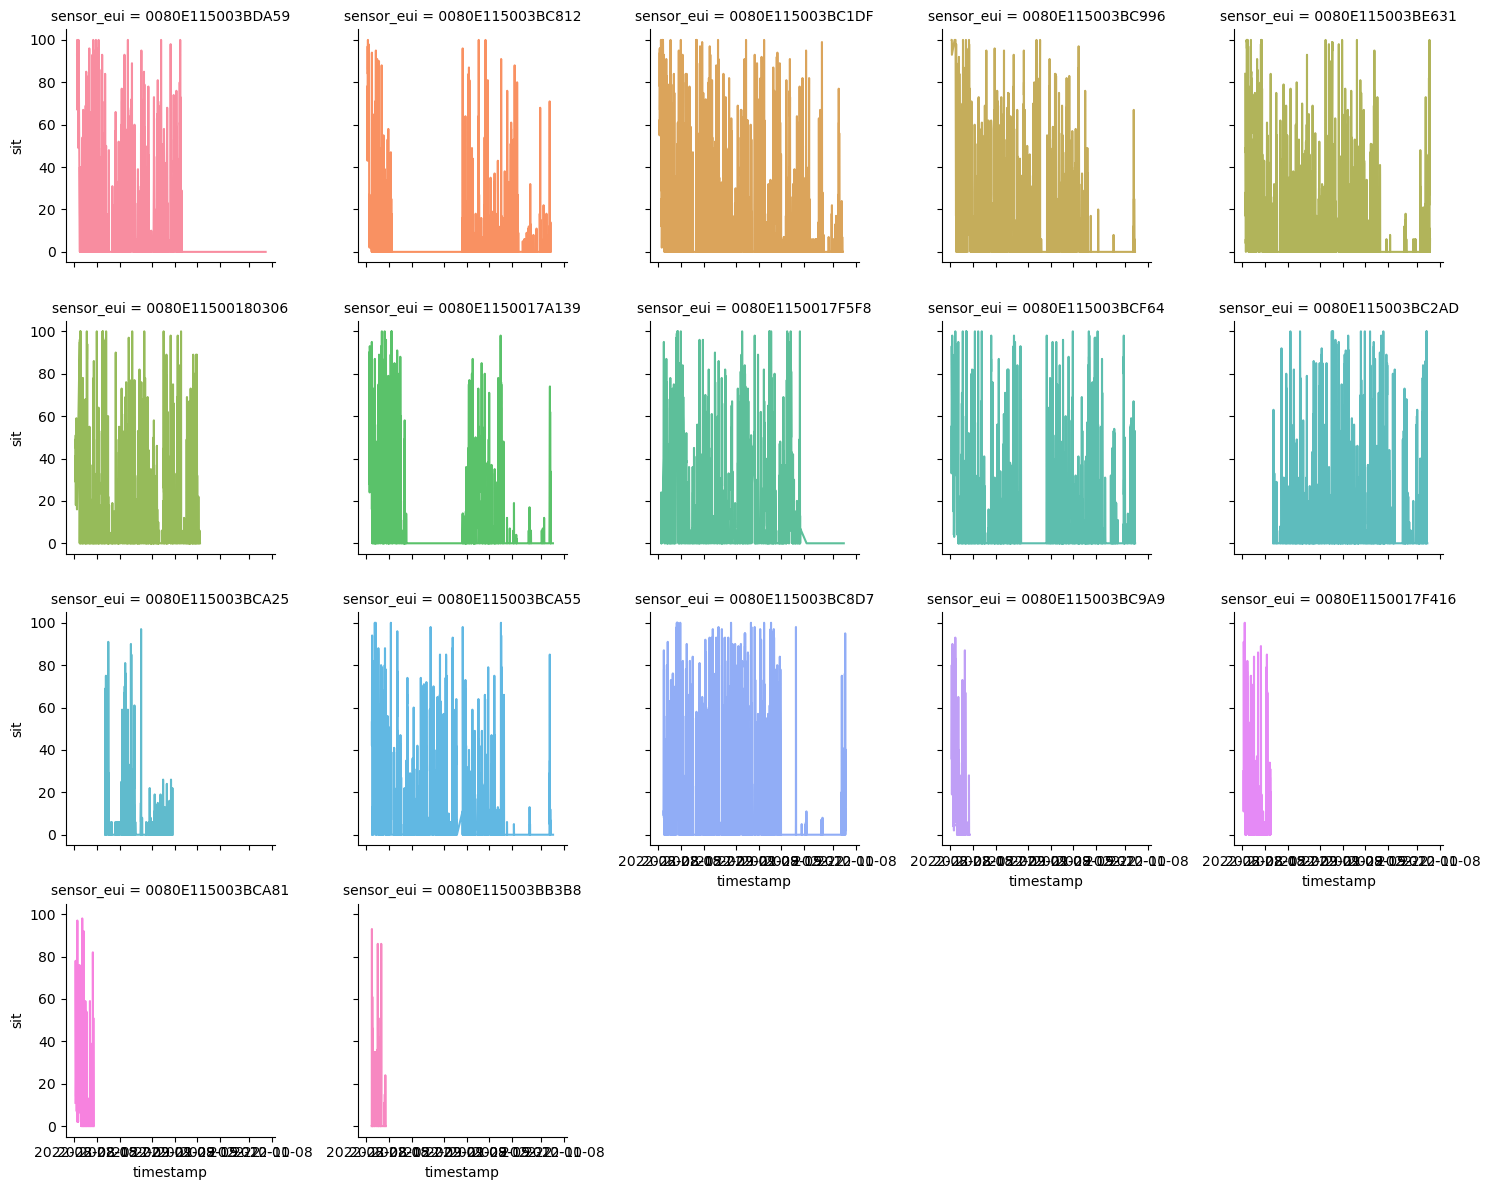

In [36]:
g2 = sns.FacetGrid(df_data2betested[['sensor_eui','sit']].loc["2022-08-08":date_today].reset_index(), col="sensor_eui", hue="sensor_eui", col_wrap=5, height=3,)
g2.map(sns.lineplot, "timestamp","sit",alpha=.8)


#### Zeitverläufe zur Lärmbelastung der einzelnen Sensoren

C:\ProgramData\Anaconda3\envs\gogo_gis\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  """Entry point for launching an IPython kernel.


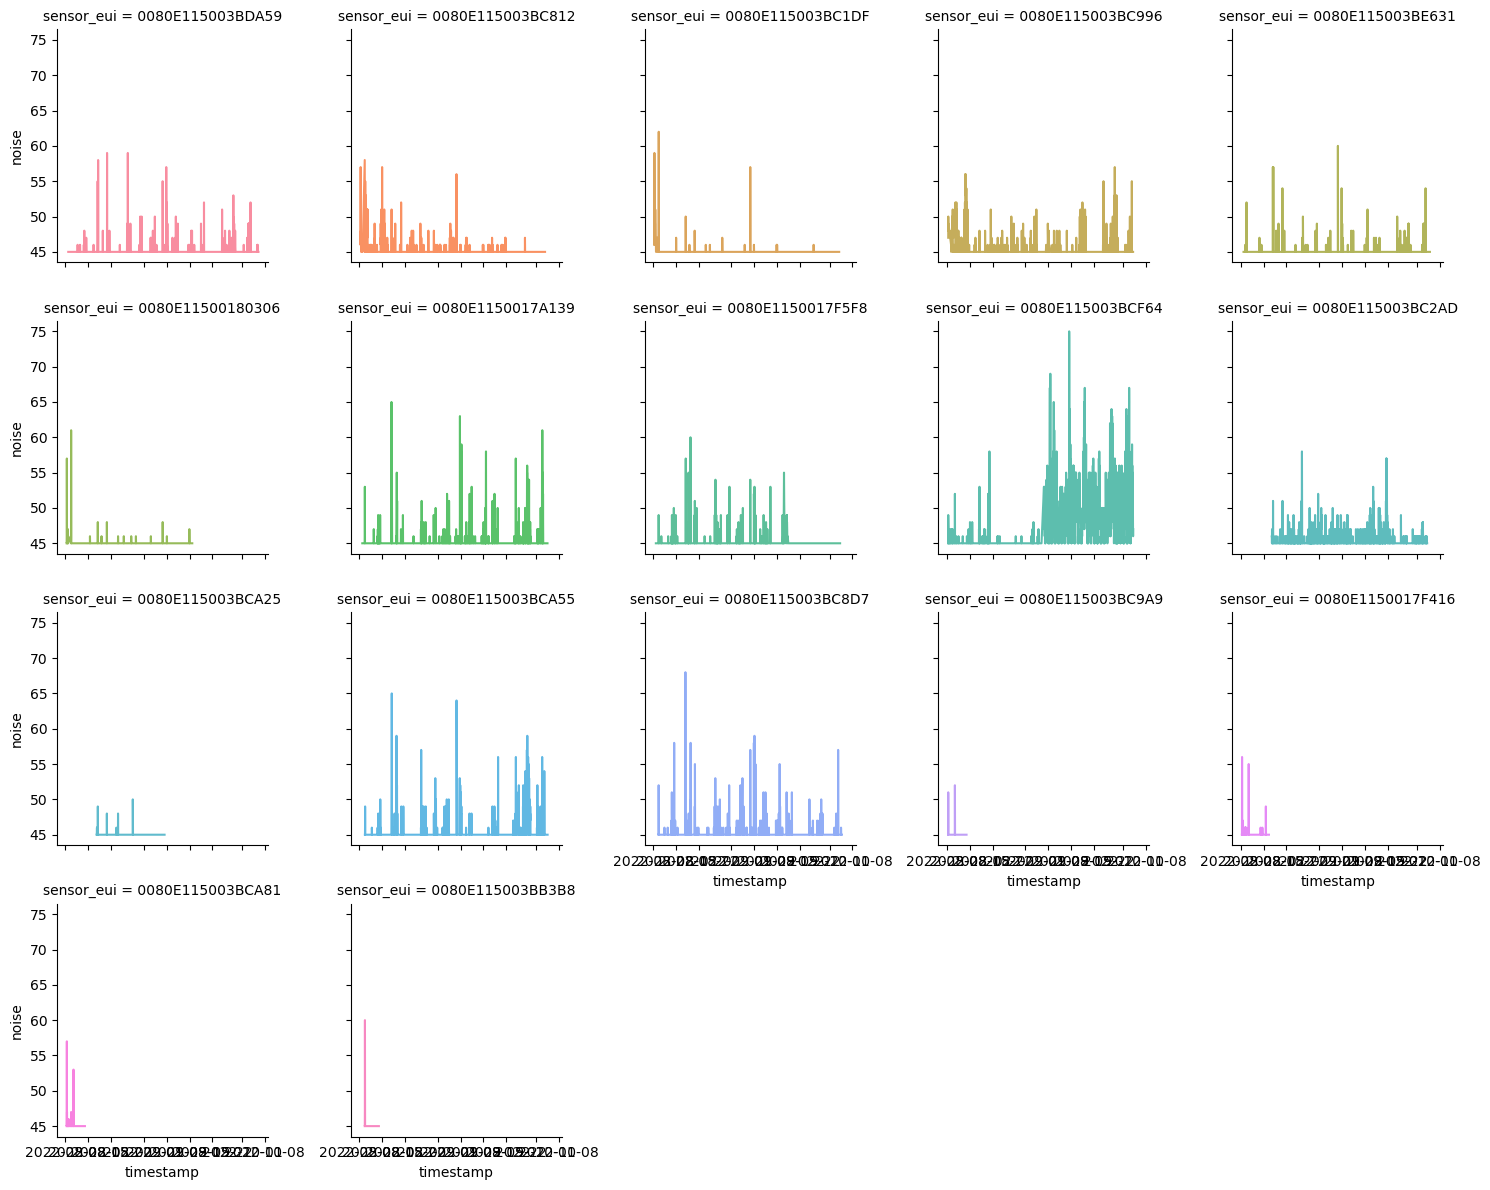

In [37]:
g3 = sns.FacetGrid(df_data2betested[['sensor_eui','noise']].loc["2022-08-08":date_today].reset_index(), col="sensor_eui", hue="sensor_eui", col_wrap=5, height=3,)
g3.map(sns.lineplot, "timestamp","noise",alpha=.8)


#### Zeitverläufe zu den Temperaturmessungen der einzelnen Sensoren

C:\ProgramData\Anaconda3\envs\gogo_gis\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  """Entry point for launching an IPython kernel.


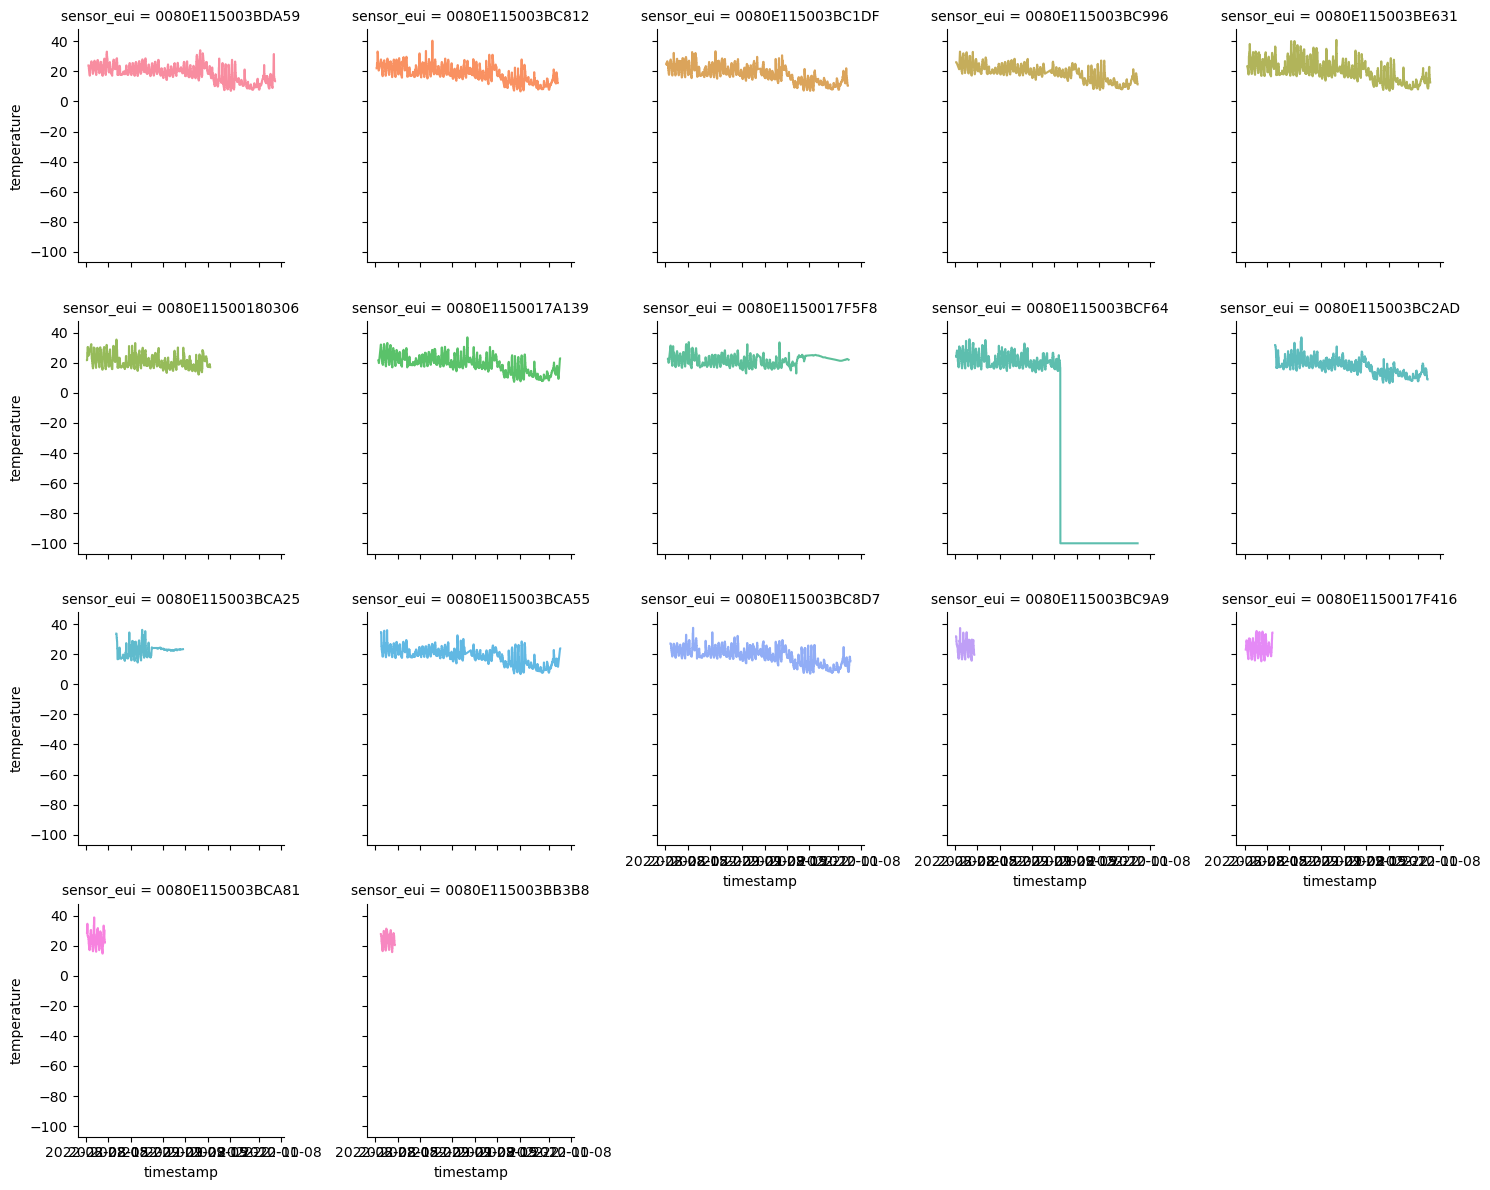

In [38]:

g4 = sns.FacetGrid(df_data2betested[['sensor_eui','temperature']].loc["2022-08-08":date_today].reset_index(), col="sensor_eui", hue="sensor_eui", col_wrap=5, height=3,)
g4.map(sns.lineplot, "timestamp","temperature",alpha=.8)